In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/content/Predicting_Magnetic_Properties_in_Planar_Molecules.csv', sep=';')

In [3]:
data.head()

,Molecule,State,TCC,x1,y1,z1,x2,y2,z2,NICS(0),NICS_zz(0),NICS(1),NICS_zz(1)
0,Benzene,0,0,0.000,0.00,0.000,0.000,0.00,1.000,-8.118,-16.375,-10.032,-30.045
1,Benzene-br,0,0,1.639,0.00,0.000,1.639,0.00,1.000,-8.346,-15.194,-9.712,-28.229
2,Benzene-ch3,0,0,0.459,0.00,0.002,0.459,0.00,1.002,-8.002,-15.087,-9.927,-29.271
3,Benzene-cho,0,0,0.878,-0.02,0.000,0.878,-0.02,1.000,-7.794,-13.579,-9.966,-28.675
4,Benzene-cl,0,0,0.949,0.00,0.000,0.949,0.00,1.000,-8.553,-15.337,-9.753,-28.423


#Dataset Analysis

In [4]:
data.columns

Index(['Molecule', 'State', 'TCC', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2',
       'NICS(0)', 'NICS_zz(0)', 'NICS(1)', 'NICS_zz(1)'],
      dtype='object')

In [5]:
data.describe()

,State,TCC,x1,y1,z1,x2,y2,z2,NICS(0),NICS_zz(0),NICS(1),NICS_zz(1)
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,0.050119,0.899761,4.321186,-9.253674,0.001778,4.321186,-9.253674,0.103385,4.445474,-1.175770,5.882783,12.083767
std,0.218321,0.300497,6.713858,9.270235,0.205251,6.713858,9.270235,1.220914,7.711027,22.067199,8.119756,21.306307
min,0.000000,0.000000,-10.655000,-28.249700,-1.980500,-10.655000,-28.249700,-2.980500,-27.696000,-101.946000,-20.956000,-64.658000
25%,0.000000,1.000000,-1.142000,-17.089875,-0.053750,-1.142000,-17.089875,-1.048450,-0.712500,-12.314750,2.124000,-1.604750
50%,0.000000,1.000000,3.425700,-8.007900,0.000000,3.425700,-8.007900,1.000000,7.466500,4.923000,9.487000,20.982500
75%,0.000000,1.000000,9.406800,-0.956625,0.038000,9.406800,-0.956625,1.038550,9.634000,11.147500,11.245500,26.887000
max,1.000000,1.000000,18.717800,12.303000,2.162400,18.717800,12.303000,10.265300,27.217000,90.950000,19.324000,58.470000


<ipython-input-6-10744fe8c2f8>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


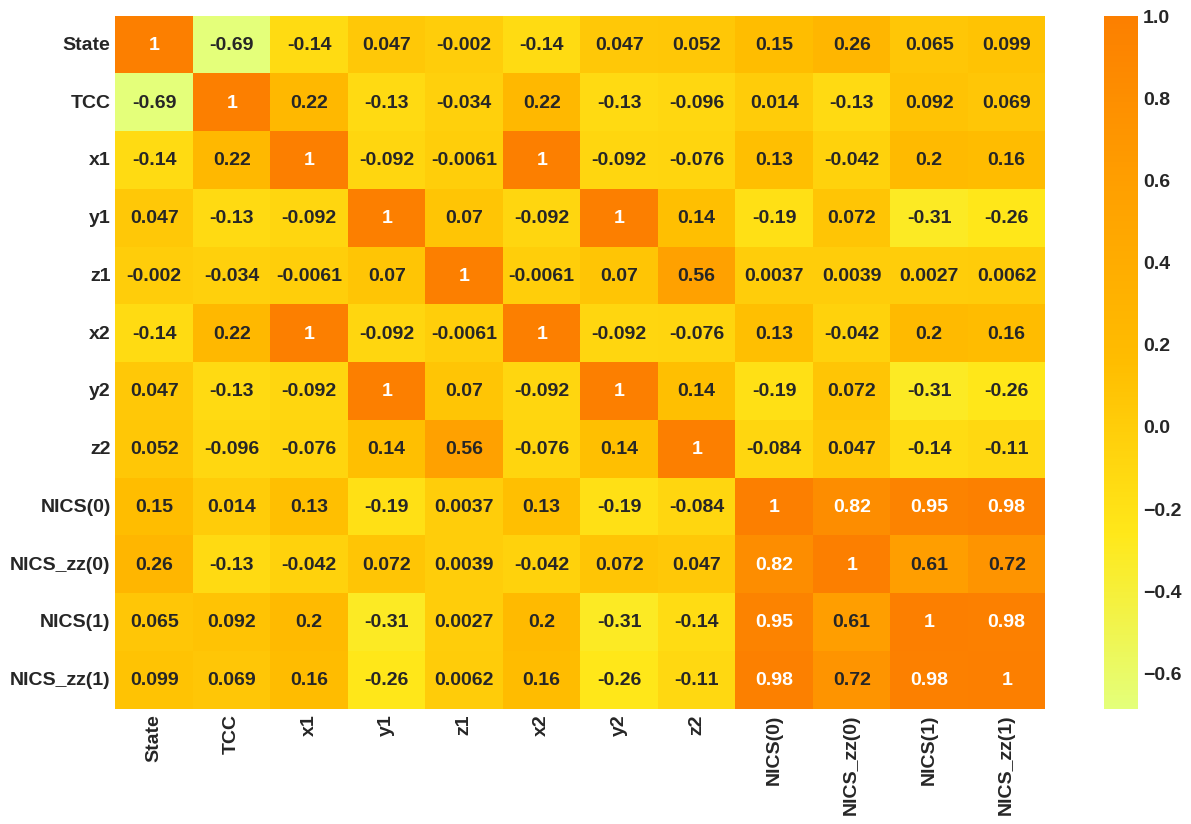

In [6]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

data_without_molecule = data.drop(columns=['Molecule'])

corr = data_without_molecule.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.savefig('Heatmap.png')
plt.show()

In [7]:
scale = lambda x: 0.82 * x
data['diff'] = data['NICS(0)'].apply(scale) - data['NICS_zz(0)']
data["diff"].describe()

count    838.000000
mean       4.821058
std       17.283755
min      -68.632060
25%       -3.380440
50%        1.243070
75%        9.407695
max       81.026980
Name: diff, dtype: float64

In [8]:
molecules = data["Molecule"].unique()
len(molecules)

174

In [9]:
m_data = {'molecule': [], "count": []}
for m in molecules:
  df_filter = data[data["Molecule"] == m]
  m_data["molecule"].append(m)
  m_data["count"].append(len(df_filter))

mol_data = pd.DataFrame(m_data)

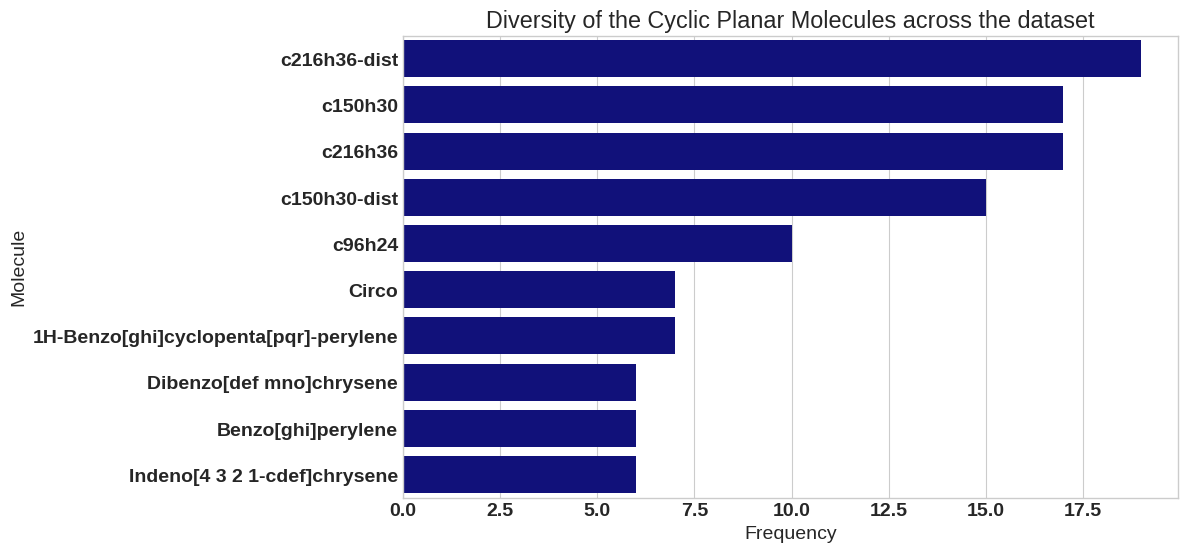

In [10]:
m_data_df = pd.DataFrame(m_data)

sorted_m_data = m_data_df.sort_values(by='count', ascending=False)

top_10_molecules = sorted_m_data.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='molecule', data=top_10_molecules, color='darkblue')
plt.xlabel('Frequency')
plt.ylabel('Molecule')
plt.title('Diversity of the Cyclic Planar Molecules across the dataset')
plt.savefig('First 10 molecules.png')
plt.show()

<ipython-input-12-599d3c178f5e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x1'],bins=50,color='r',ax=ax)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


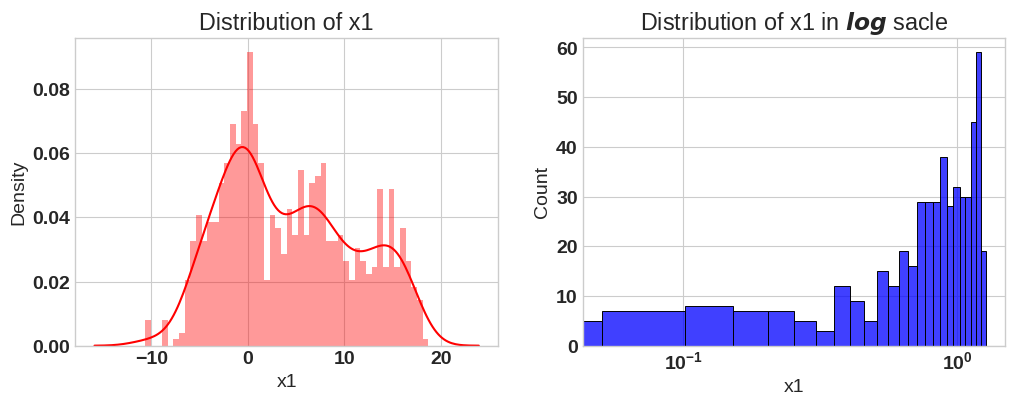

In [12]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['x1'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of x1')

ax=f.add_subplot(122)
sns.histplot(np.log10(data['x1']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of x1 in $log$ sacle')
ax.set_xscale('log');

plt.savefig('distribution_comparison.png')
plt.show()

#Data Preprocessing

In [13]:
# Box Cox Transformation with standarScaler

numeric_columns = ['State', 'TCC', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2',
       'NICS(0)', 'NICS_zz(0)', 'NICS(1)', 'NICS_zz(1)']

numeric_data = data[numeric_columns]

offset = 0.1

for col in numeric_data.columns:
    if (numeric_data[col] > 0).all():
        numeric_data.loc[:, col], _ = boxcox(numeric_data[col])
    else:
        numeric_data.loc[:, col] = numeric_data[col] - numeric_data[col].min() + offset
        numeric_data.loc[:, col], _ = boxcox(numeric_data[col])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_columns)

data[numeric_columns] = numeric_data_scaled_df

In [14]:
# Categorical columns turn into dummy columns for each Cyclic Planar Molecule

categorical_columns = ['Molecule']
df_encode = pd.get_dummies(data = data, prefix = 'dummy', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [15]:
df_encode

,State,TCC,x1,y1,z1,x2,y2,z2,NICS(0),NICS_zz(0),...,dummy_Picene,dummy_Pyrene,dummy_Triphenylene,dummy_as-Indacene,dummy_c150h30,dummy_c150h30-dist,dummy_c216h36,dummy_c216h36-dist,dummy_c96h24,dummy_s-Indacene
0,-0.229704,-2.996029,-0.581528,0.991333,-0.016337,-0.581528,0.991333,0.797808,-1.607627,-0.729416,...,0,0,0,0,0,0,0,0,0,0
1,-0.229704,-2.996029,-0.318851,0.991333,-0.016337,-0.318851,0.991333,0.797808,-1.627761,-0.677144,...,0,0,0,0,0,0,0,0,0,0
2,-0.229704,-2.996029,-0.506587,0.991333,-0.006551,-0.506587,0.991333,0.799220,-1.597293,-0.672396,...,0,0,0,0,0,0,0,0,0,0
3,-0.229704,-2.996029,-0.439142,0.989263,-0.016337,-0.439142,0.989263,0.797808,-1.578611,-0.605283,...,0,0,0,0,0,0,0,0,0,0
4,-0.229704,-2.996029,-0.427801,0.991333,-0.016337,-0.427801,0.991333,0.797808,-1.645836,-0.683485,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,-0.229704,0.333775,-1.139375,-0.313867,0.084532,-1.139375,-0.313867,0.812334,0.504848,0.261684,...,0,0,0,0,0,0,0,0,0,0
834,-0.229704,0.333775,-0.756629,-0.264378,0.087962,-0.756629,-0.264378,0.812827,-1.151499,-1.688264,...,0,0,0,0,0,0,0,0,0,0
835,-0.229704,0.333775,-0.967853,-0.070873,0.079632,-0.967853,-0.070873,0.811630,0.110341,-0.067685,...,0,0,0,0,0,0,0,0,0,0
836,-0.229704,0.333775,-0.551366,-0.068458,0.081102,-0.551366,-0.068458,0.811841,1.135402,0.790267,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_1 = df_encode.drop("NICS(0)", axis=1)
df_1 = df_1.drop("NICS_zz(0)", axis=1)
df_1 = df_1.drop("NICS_zz(1)", axis=1)
df_1 = df_1.drop("NICS(1)", axis=1)

In [17]:
X = df_1.values
y = df_encode[['NICS(0)', 'NICS_zz(0)', 'NICS(1)', 'NICS_zz(1)']].values

#Algorithm Architecture

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=23)



**---> 64 neurons**



MSE - Train: 0.008449059188590803
R2 - Train: 0.9915463641354267
MSE - Test: 0.042776335694063534
R2 - Test: 0.9568585453205721
---------------------------------


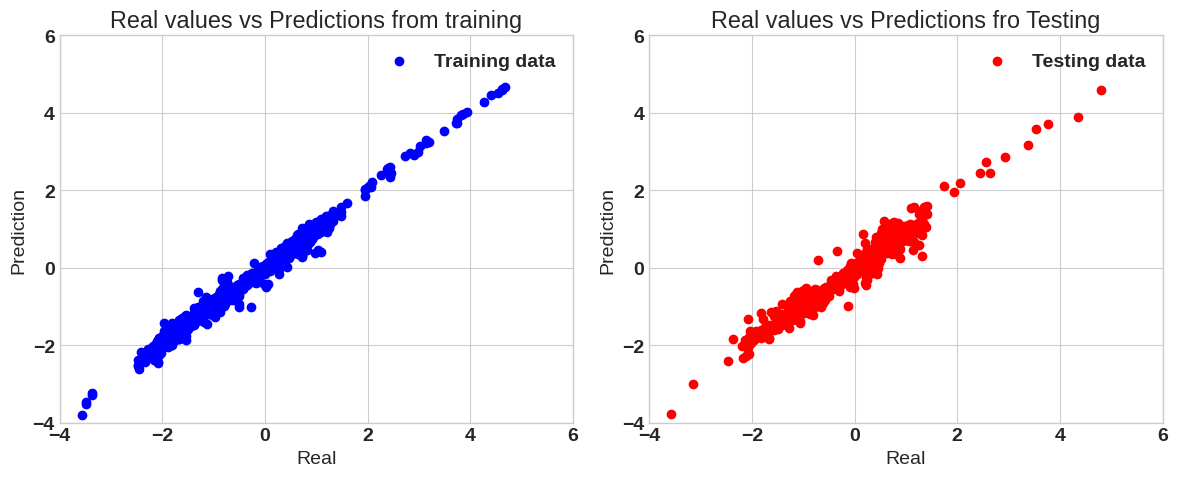

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE - Train: 0.006463571808393201
R2 - Train: 0.9934894954348119
MSE - Test: 0.044694422091892394
R2 - Test: 0.9567267253785099
---------------------------------


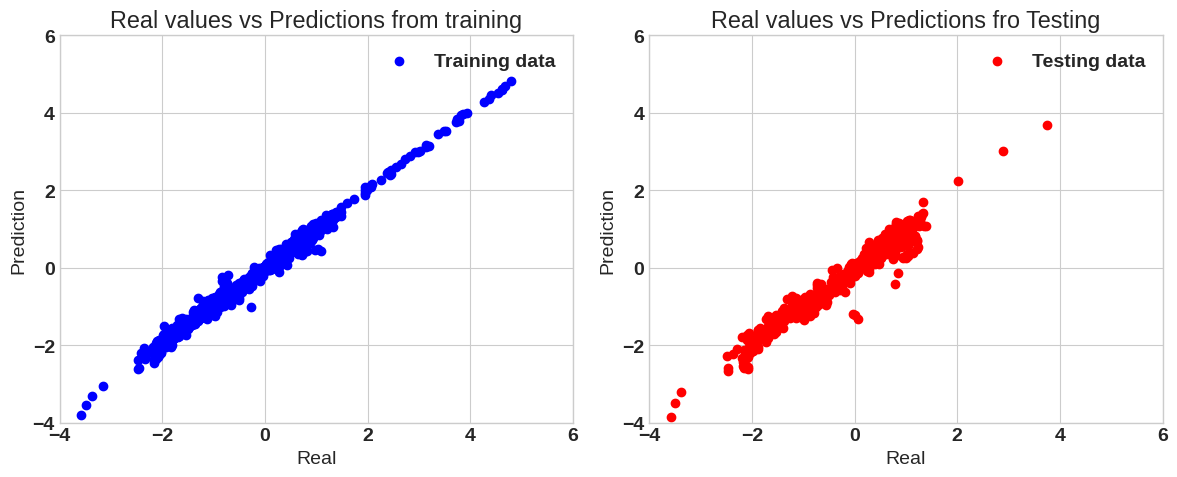

MSE - Train: 0.007665923432276596
R2 - Train: 0.9922074593357905
MSE - Test: 0.07620607798840533
R2 - Test: 0.9277531433662833
---------------------------------


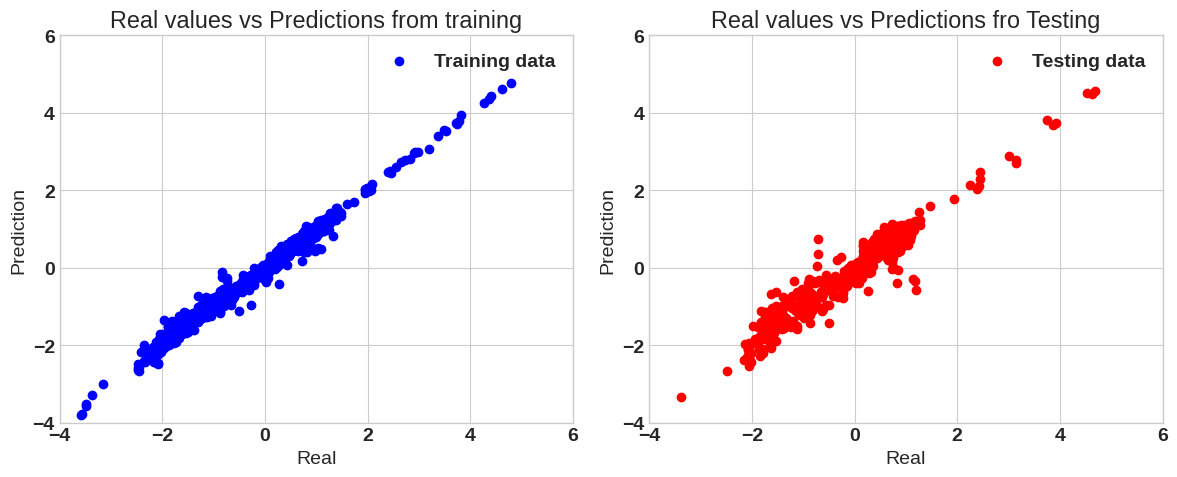

MSE - Train: 0.0077082413791410955
R2 - Train: 0.9925890634296047
MSE - Test: 0.052648994447432554
R2 - Test: 0.9371687107546639
---------------------------------


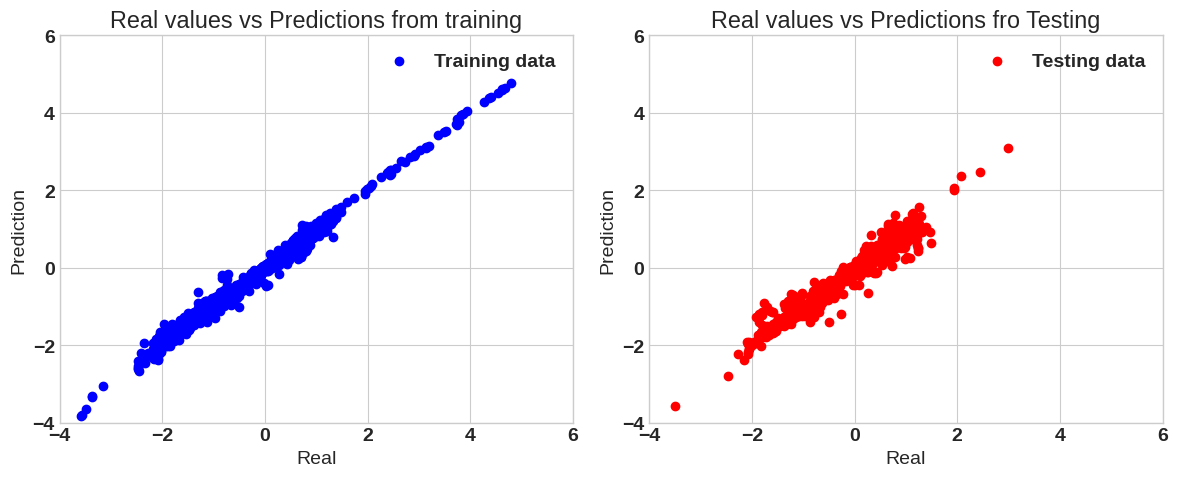

MSE - Train: 0.008059464604369283
R2 - Train: 0.9918095856787557
MSE - Test: 0.06230190727843394
R2 - Test: 0.9416062730295096
---------------------------------


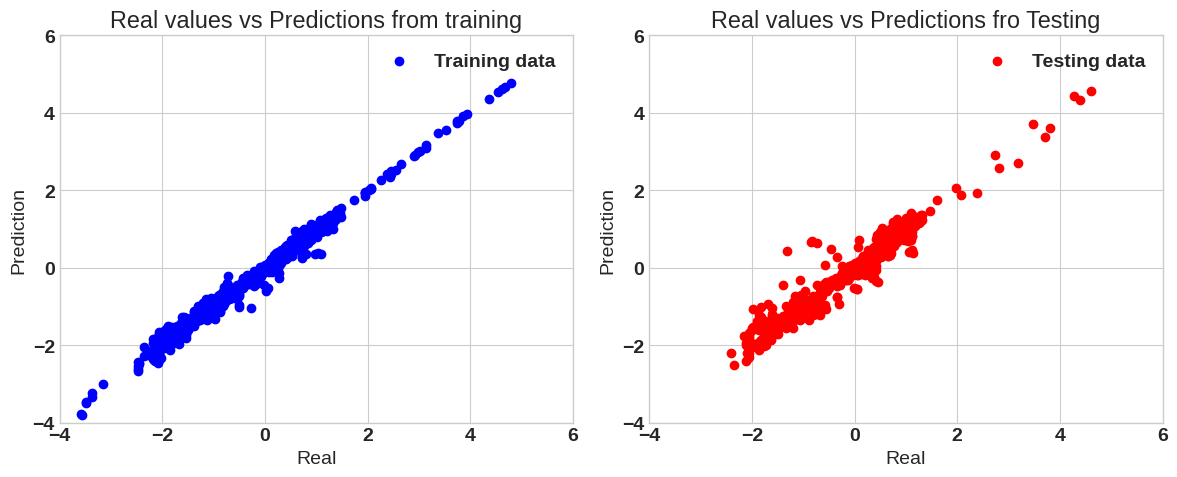

In [19]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(32,32), activation='relu', alpha=0.00000001, random_state=888)
    mlp_regressor.fit(X_train, y_train)

    y_train_pred = mlp_regressor.predict(X_train)

    y_pred = mlp_regressor.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print("MSE - Train:", mse_train)
    print("R2 - Train:", r2_train)
    print("MSE - Test:", mse_test)
    print("R2 - Test:", r2_test)
    print("---------------------------------")

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(y_train, y_train_pred, color='blue', label='Training data')
    axs[0].set_xlabel('Real')
    axs[0].set_ylabel('Prediction')
    axs[0].set_title('Real values vs Predictions from training')
    axs[0].legend()
    axs[0].set_xlim([-4, 6])
    axs[0].set_ylim([-4, 6])

    axs[1].scatter(y_test, y_pred, color='red', label='Testing data')
    axs[1].set_xlabel('Real')
    axs[1].set_ylabel('Prediction')
    axs[1].set_title('Real values vs Predictions fro Testing')
    axs[1].legend()
    axs[1].set_xlim([-4, 6])
    axs[1].set_ylim([-4, 6])

    plt.tight_layout()
    plt.show()

**---> 128 neurons**

MSE - Train: 0.006673109929748287
R2 - Train: 0.9933220857356492
MSE - Test: 0.04163064505548514
R2 - Test: 0.9580854644945842
---------------------------------


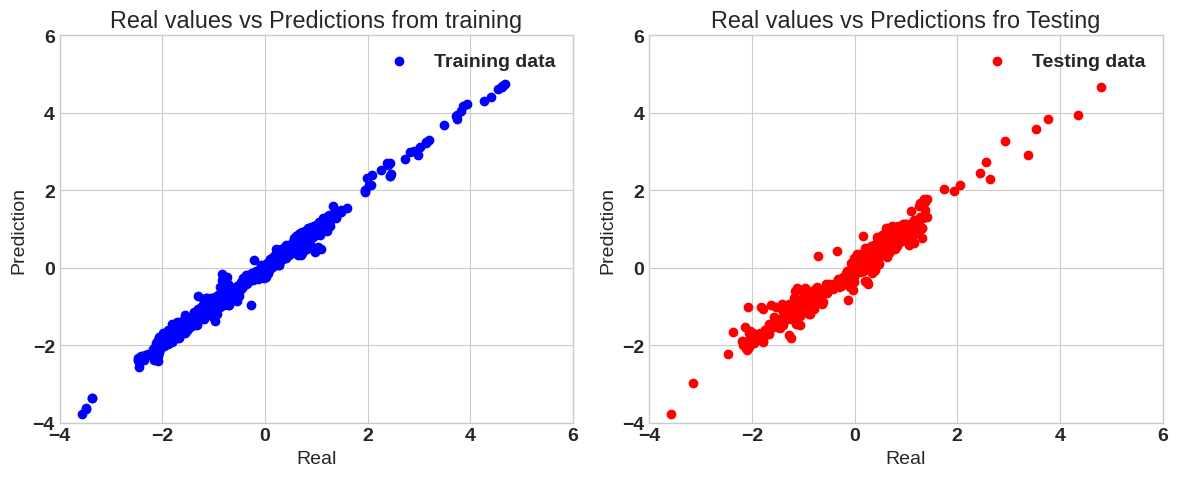

MSE - Train: 0.004988866333118669
R2 - Train: 0.9949742188859997
MSE - Test: 0.03223041461665074
R2 - Test: 0.9687884493770887
---------------------------------


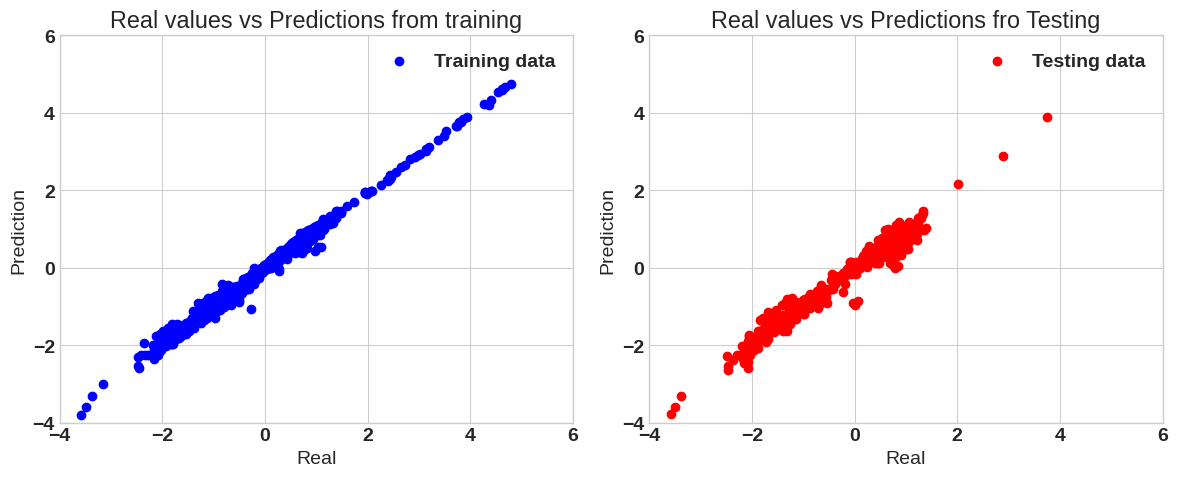

MSE - Train: 0.004236183031170929
R2 - Train: 0.9956937750164343
MSE - Test: 0.07224297359261869
R2 - Test: 0.9314700323935876
---------------------------------


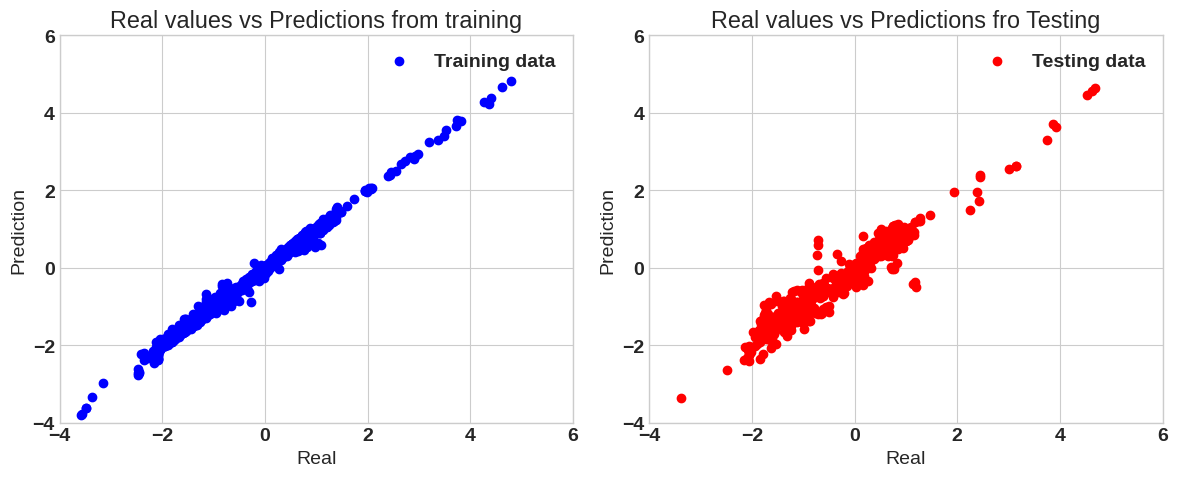

MSE - Train: 0.0033004061790440787
R2 - Train: 0.9968291811373138
MSE - Test: 0.0437965562915332
R2 - Test: 0.9476585590615756
---------------------------------


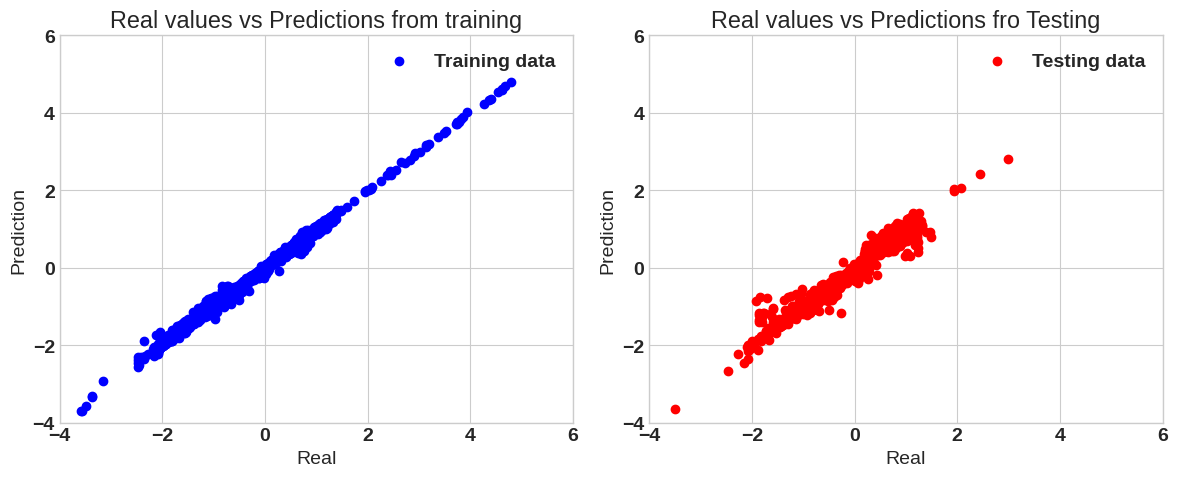

MSE - Train: 0.004441458537796978
R2 - Train: 0.9954827680741636
MSE - Test: 0.06462361903536168
R2 - Test: 0.939559168829768
---------------------------------


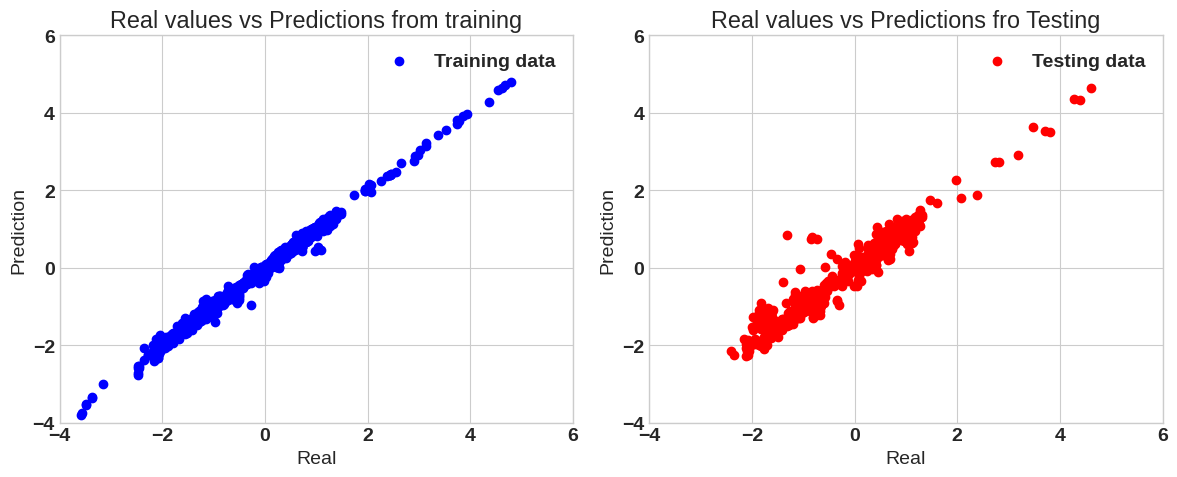

In [20]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(64,64), activation='relu', alpha=0.00000001, random_state=888)
    mlp_regressor.fit(X_train, y_train)

    y_train_pred = mlp_regressor.predict(X_train)

    y_pred = mlp_regressor.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print("MSE - Train:", mse_train)
    print("R2 - Train:", r2_train)
    print("MSE - Test:", mse_test)
    print("R2 - Test:", r2_test)
    print("---------------------------------")

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(y_train, y_train_pred, color='blue', label='Training data')
    axs[0].set_xlabel('Real')
    axs[0].set_ylabel('Prediction')
    axs[0].set_title('Real values vs Predictions from training')
    axs[0].legend()
    axs[0].set_xlim([-4, 6])
    axs[0].set_ylim([-4, 6])

    axs[1].scatter(y_test, y_pred, color='red', label='Testing data')
    axs[1].set_xlabel('Real')
    axs[1].set_ylabel('Prediction')
    axs[1].set_title('Real values vs Predictions fro Testing')
    axs[1].legend()
    axs[1].set_xlim([-4, 6])
    axs[1].set_ylim([-4, 6])

    plt.tight_layout()
    plt.show()

**---> 256 neurons**

MSE - Train: 0.003059705408568776
R2 - Train: 0.9969411044834103
MSE - Test: 0.03767536281605079
R2 - Test: 0.9620515745284659
---------------------------------


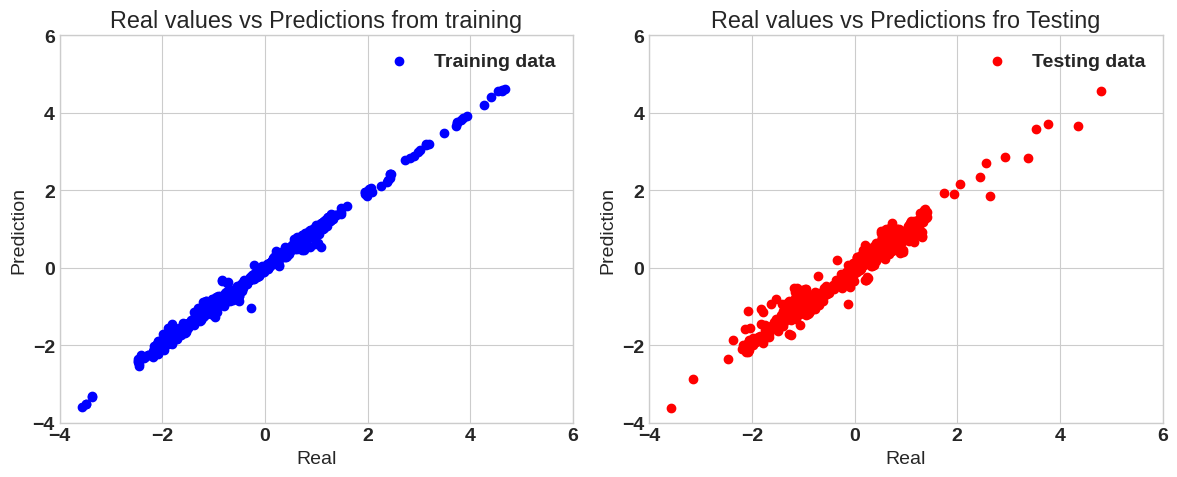

MSE - Train: 0.008082563989655272
R2 - Train: 0.9918573359023779
MSE - Test: 0.037976299950613135
R2 - Test: 0.9631976046288278
---------------------------------


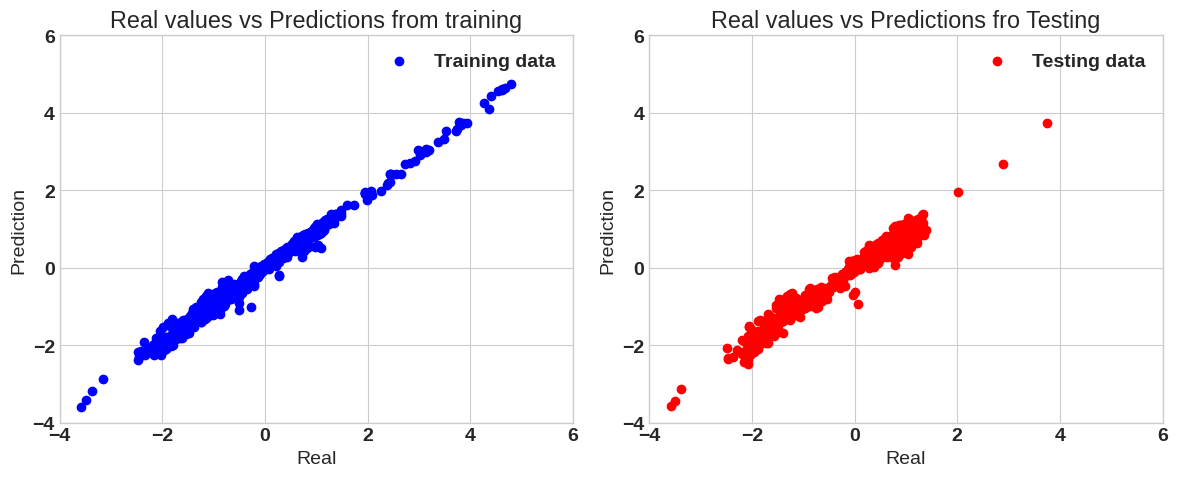

MSE - Train: 0.004180946040615675
R2 - Train: 0.9957515651812536
MSE - Test: 0.08464768038662462
R2 - Test: 0.9197365780857432
---------------------------------


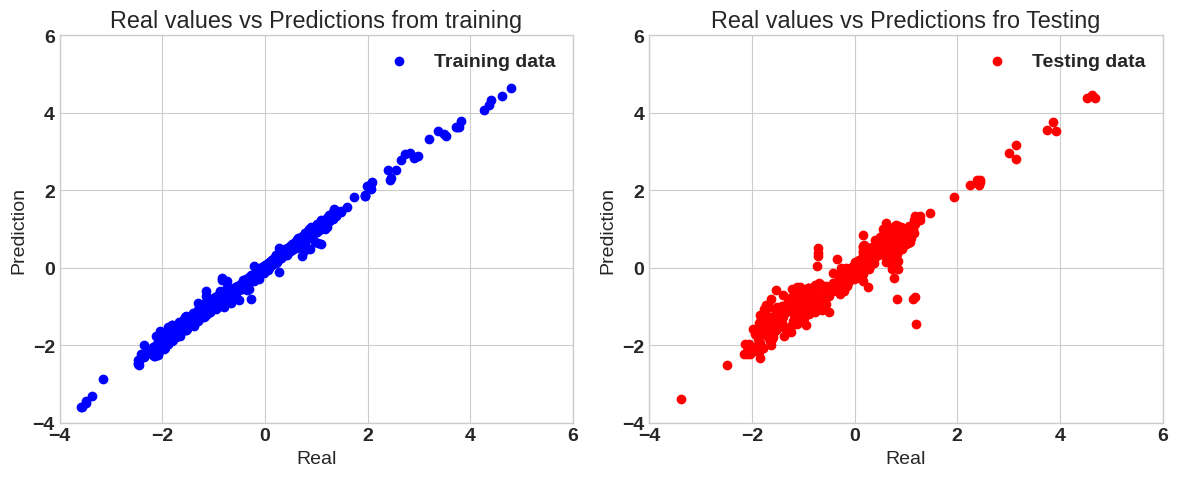

MSE - Train: 0.004567160638211724
R2 - Train: 0.9956117616900916
MSE - Test: 0.04730072660660245
R2 - Test: 0.9435195969374139
---------------------------------


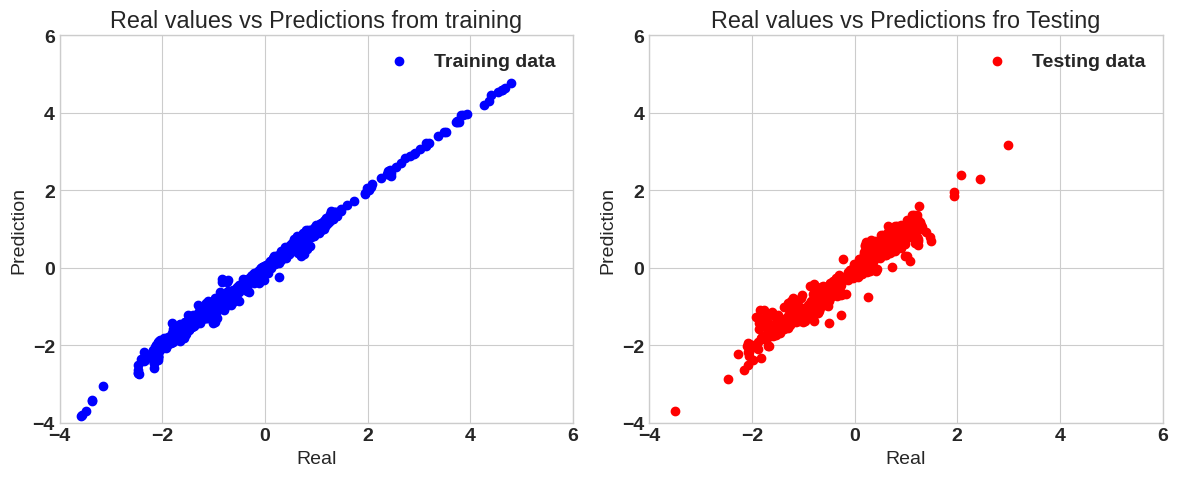

MSE - Train: 0.0037071980500052275
R2 - Train: 0.996231035500283
MSE - Test: 0.06091731883325108
R2 - Test: 0.9429760671410212
---------------------------------


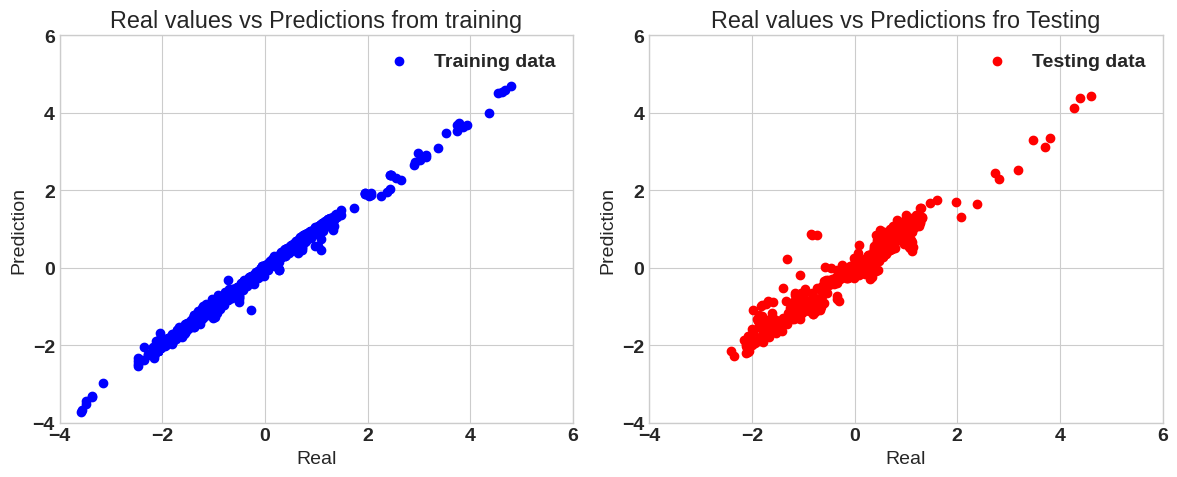

In [21]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(128, 128), activation='relu', alpha=0.00000001, random_state=888)
    mlp_regressor.fit(X_train, y_train)

    y_train_pred = mlp_regressor.predict(X_train)

    y_pred = mlp_regressor.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print("MSE - Train:", mse_train)
    print("R2 - Train:", r2_train)
    print("MSE - Test:", mse_test)
    print("R2 - Test:", r2_test)
    print("---------------------------------")

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(y_train, y_train_pred, color='blue', label='Training data')
    axs[0].set_xlabel('Real')
    axs[0].set_ylabel('Prediction')
    axs[0].set_title('Real values vs Predictions from training')
    axs[0].legend()
    axs[0].set_xlim([-4, 6])
    axs[0].set_ylim([-4, 6])

    axs[1].scatter(y_test, y_pred, color='red', label='Testing data')
    axs[1].set_xlabel('Real')
    axs[1].set_ylabel('Prediction')
    axs[1].set_title('Real values vs Predictions fro Testing')
    axs[1].legend()
    axs[1].set_xlim([-4, 6])
    axs[1].set_ylim([-4, 6])

    plt.tight_layout()
    plt.show()